In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib qt

**Create training data**

<function matplotlib.pyplot.show(close=None, block=None)>

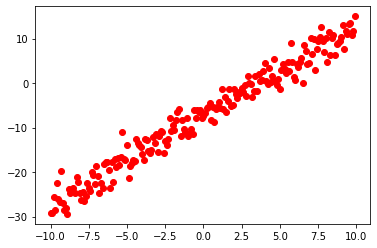

In [2]:
x = np.arange(-10, 10, 0.1)
n_sample = len(x)

noise = np.random.normal(0, 2, n_sample)
Y = 2*x - 7 + noise

# Vectorize X
ones = np.ones(n_sample)
X = np.vstack((ones, x)).astype('float32') # Stack arrays in sequence vertically

# Use the below line in Jupyter Notebook to view the plot inside notebook, it doesn't work in Google Colab
%matplotlib inline
plt.plot(x, Y, "ro")
plt.show

**Set value:** theta<br>
**Define:** loss function<br>
**Note:** Do not define the derivative of the loss function because tensorflow will take the derivative by itself

In [3]:

epsilon = 0.001

@tf.function
def Loss(theta):
    Y_pre = tf.matmul(tf.transpose(theta), X)
    return tf.reduce_mean(tf.square(Y_pre - Y))

**Loop:**<br>
<span style="margin-left:2em">Update theta</span><br>

In [18]:
theta = tf.Variable(np.array([[-15.0], # theta_0
                              [12.0]], # theta_1
                             dtype=np.float32),
                    trainable=True
)

with tf.GradientTape() as tape:
    loss = Loss(theta)
    print(loss)


print(theta)
grads = tape.gradient(loss, [theta])
print(grads)

tf.Tensor(3406.4382, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-15.],
       [ 12.]], dtype=float32)>
[<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-16.56818],
       [667.4586 ]], dtype=float32)>]


In [19]:
# W = tf.Variable(np.array([[1], [2]]).astype('float32'), trainable=True)
W = tf.Variable(np.array([[-15.0], [12.0]], dtype=np.float32))

with tf.GradientTape() as tape_2:
    loss = Loss(W)
    print(loss)


print(W)
grads = tape_2.gradient(loss, [W])
print(grads)

tf.Tensor(3406.4382, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-15.],
       [ 12.]], dtype=float32)>
[<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-16.56818],
       [667.4586 ]], dtype=float32)>]


In [4]:
# Use the below line in Jupyter Notebook to view the plot with interactive window, it doesn't work in Google Colab
%matplotlib qt
plt.xlim(-15, 15)
plt.ylim(-30, 20)

plt.plot(x, Y, "ro")

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
epoch = 10
count_epoch = 1
while True:
    # Calculate loss
    with tf.GradientTape() as tape:
        loss = Loss(theta)
        print("Loss:\n", loss)
    print("theta:\n", theta)
    
    # Draw a line using theta to see how the algorithm is doing
    x_vis = np.array([-15.0, 15.0])
    y_vis = theta[1][0]*x_vis + theta[0][0]
    plt.plot(x_vis, y_vis)
    plt.pause(0.01)

    # Update theta
    grads = tape.gradient(loss, [theta])
    opt.apply_gradients(zip(grads, [theta]))
    
    print("Epoch: %d   Loss %.8f   Theta_1_0: %.8f %.8f" % (count_epoch, loss.numpy(), theta[1][0], theta[0][0]))
    
    # Check if all values in loss is less than epsilon
    # It will probably take a long time to satisfy the above condition, so we will have to use epoch
    if tf.experimental.numpy.all((tf.math.abs(grads) < epsilon)) or count_epoch == epoch:
        break   
    count_epoch += 1

Loss:
 tf.Tensor(3399.776, shape=(), dtype=float32)
theta:
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-15.],
       [ 12.]], dtype=float32)>
Epoch: 1   Loss 3399.77587891   Theta_1_0: 5.33287287 -14.83181095
Loss:
 tf.Tensor(433.7896, shape=(), dtype=float32)
theta:
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-14.831811],
       [  5.332873]], dtype=float32)>
Epoch: 2   Loss 433.78961182   Theta_1_0: 3.11088753 -14.67365265
Loss:
 tf.Tensor(102.20863, shape=(), dtype=float32)
theta:
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-14.673653 ],
       [  3.1108875]], dtype=float32)>
Epoch: 3   Loss 102.20863342   Theta_1_0: 2.37045813 -14.52087975
Loss:
 tf.Tensor(63.361183, shape=(), dtype=float32)
theta:
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-14.52088  ],
       [  2.3704581]], dtype=float32)>
Epoch: 4   Loss 63.36118317   Theta_1_0: 2.12382579 -14.37190247
Loss:
 tf.Tensor(57.11

**Result:** theta after running Linear Regression<br>
**Note:** The algorithm runs **correctly** when **theta_1** and **theta_0** values **approximate** the **weight** and **bias** values of the line equation in the training data generation part.

In [5]:
print("Giá trị tối ưu hiện tại của theta_1: ", theta[1][0].numpy())
print("Giá trị tối ưu hiện tại của theta_0: ", theta[0][0].numpy())

Giá trị tối ưu hiện tại của theta_1:  2.0018682
Giá trị tối ưu hiện tại của theta_0:  -13.540506
